In [58]:
import yfinance as yf
import json
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import dates as mdates

%matplotlib inline

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (30, 10)

In [35]:
stock_dir_path = str(Path(os.path.abspath('')).parents[0] / 'data/stock_data/')
tickers_path = str(Path(os.path.abspath('')).parents[0] / 'data/stocksTickers.json')


In [27]:
tickers_path = str(Path(os.path.abspath('')).parents[0] / 'data/stocksTickers.json')
with open(tickers_path) as ticker_names: 
    names = json.load(ticker_names)

In [32]:
def download_yfinance_data(names_dict, peroid='10y', dir_path=stock_dir_path): 

    for ticker_name, name in names_dict.items(): 
        ticker = yf.Ticker(ticker_name)
        data = ticker.history(period=peroid)
        data.to_csv(str(Path(dir_path) / f'{name.lower()}.csv'))

In [33]:
download_yfinance_data(names_dict=names)

In [37]:
def load_all_stocks_data(stock_path=stock_dir_path):
    data_dict = {}
    for filename in os.listdir(stock_dir_path): 
        data_dict[filename.split('.')[0]] = pd.read_csv(str(Path(stock_path) / filename))






























































        
    return data_dict

In [38]:
data_dict = load_all_stocks_data()

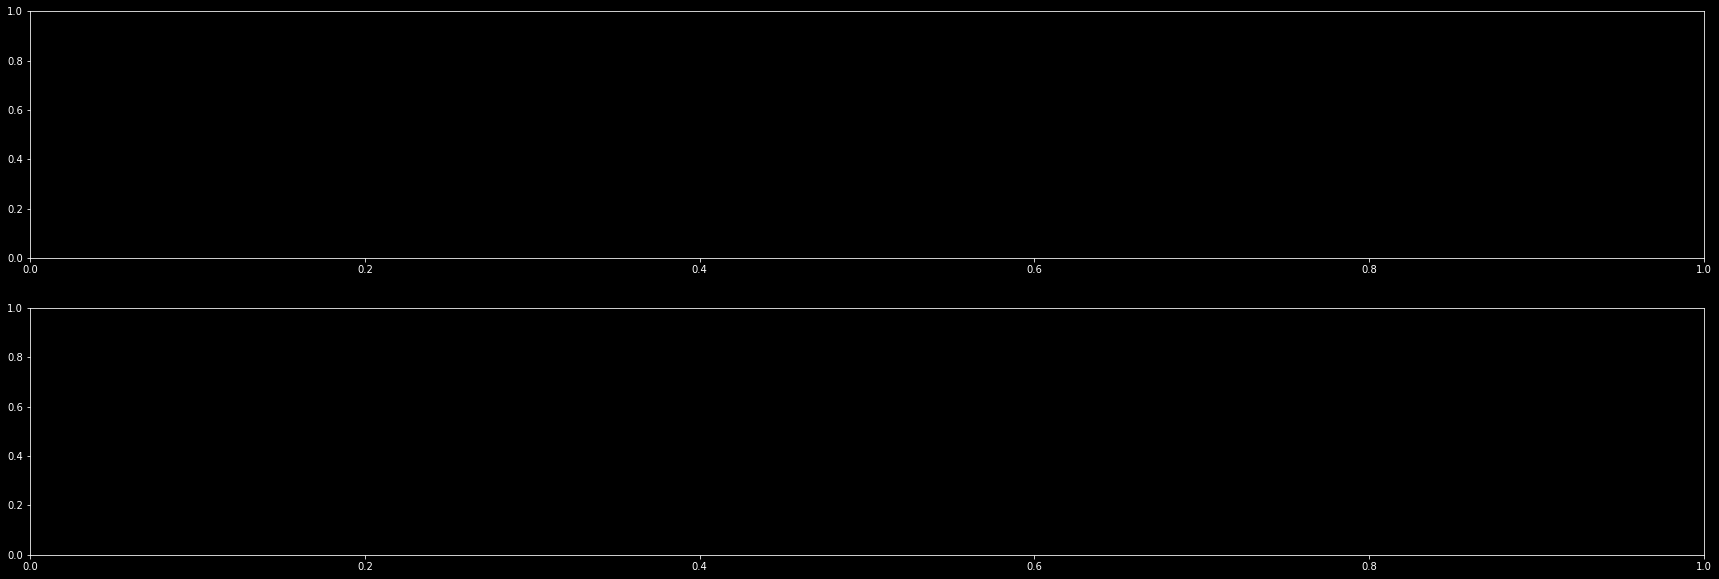

In [76]:
fig, (ax1, ax2) =plt.subplots(2, 1, figsize=(30, 10))

<AxesSubplot:>

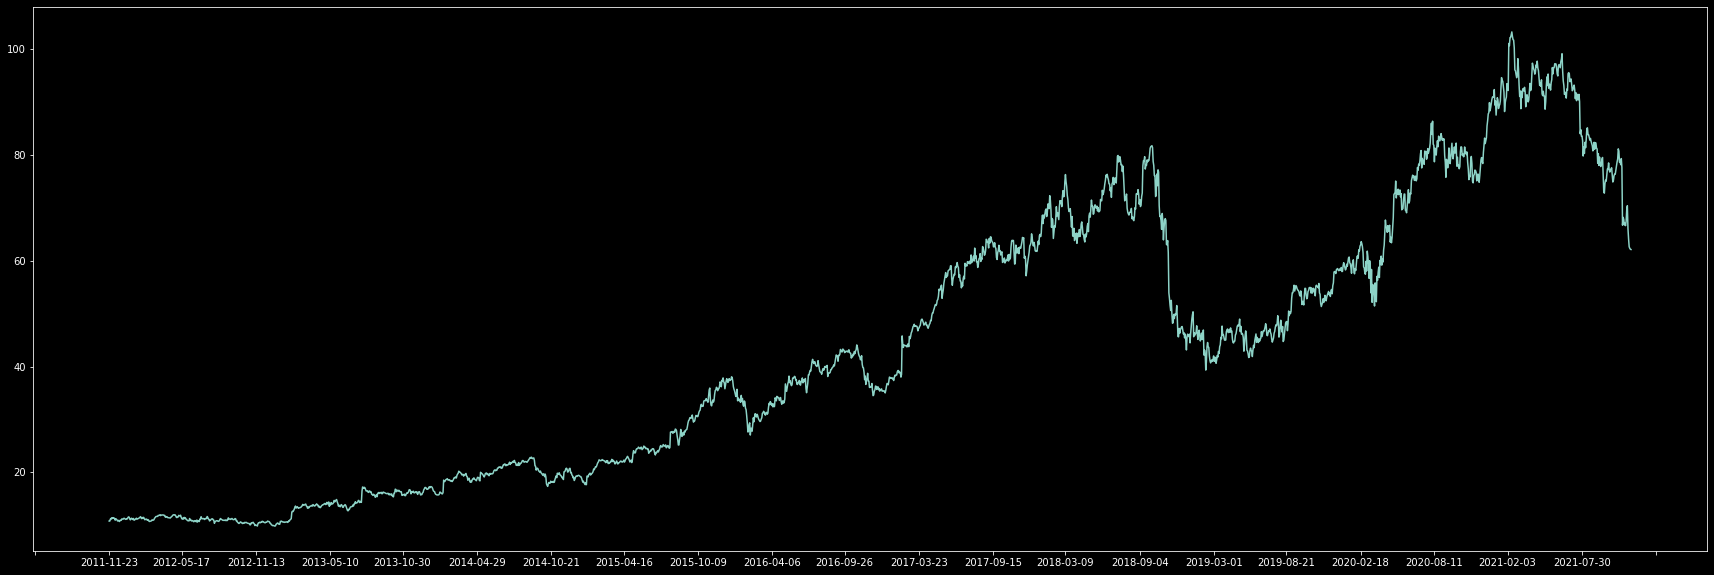

In [67]:
blizzard = data_dict['blizzard']
fig, ax=plt.subplots(1, 1, figsize=(30, 10))
ax.plot(blizzard['Date'], blizzard['Close'])
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=20, maxticks=30))

plt.show()

In [72]:
def plot_all_prices(data_dict, x_col, y_col, figsize:tuple, minticks=20, maxticks=30): 
    
    fig, axes = plt.subplots(len(data_dict), 1, figsize=figsize)

    for ax, (company, data) in zip(axes, data_dict.items()):
        ax.plot(data[x_col], data[y_col])
        ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=minticks, maxticks=maxticks))
        